In [35]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm  

df = pd.read_csv("QSurvey.csv")

df.head()


,Q_RecaptchaScore,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,FL_22_DO
0,1.0,Female,White or Caucasian,"Graduate or professional degree (MA, MS, MBA, ...",Liberal,Neither agree nor disagree,Somewhat agree,Strongly disagree,Canada,Somewhat agree,Somewhat agree,Neither agree nor disagree,Somewhat agree,Extremely positive,Somewhat negative,Not at all,FL_24
1,1.0,Female,Black or African American,"Some college, but no degree",Very conservative,Strongly disagree,Strongly disagree,Strongly disagree,Canada,Strongly agree,Strongly agree,Strongly agree,Strongly agree,Extremely positive,Somewhat positive,Not at all,FL_24
2,0.9,Male,White or Caucasian,Associates or technical degree,Very liberal,Strongly disagree,Strongly disagree,Strongly disagree,Canada,Strongly disagree,Somewhat agree,Strongly agree,Strongly agree,Somewhat positive,Extremely negative,Not at all,FL_23
3,1.0,Male,White or Caucasian,"Some college, but no degree",Very liberal,Somewhat agree,Neither agree nor disagree,Strongly disagree,The United States,Strongly disagree,Neither agree nor disagree,Somewhat agree,Strongly agree,Somewhat positive,Neither positive nor negative,Not at all,FL_24
4,NaN,Female,White or Caucasian,"Graduate or professional degree (MA, MS, MBA, ...",Conservative,Neither agree nor disagree,Somewhat agree,Neither agree nor disagree,The United States,Somewhat agree,Neither agree nor disagree,Somewhat agree,Somewhat agree,Neither positive nor negative,Somewhat negative,Mostly,FL_23


In [36]:
agree_map = {
    "Strongly disagree": 1,
    "Somewhat disagree": 2,
    "Neither agree nor disagree": 3,
    "Somewhat agree": 4,
    "Strongly agree": 5
    
}

affect_map={
    "Extremely negative": 1,
    "Somewhat negative": 2,
    "Neither positive nor negative": 3,
    "Somewhat positive": 4,
    "Extremely positive": 5
}

six_pt_map={
"Not at all": 1,
"Slightly": 2,
"Somewhat":  3, 
"Mostly": 4,
"Extremely":  5,
"Not sure":  None

}

political_map ={
    "Very liberal": 1,
    "Liberal":2,
    "Moderate": 3,
    "Conservative": 4,
    "Very conservative": 5,
    "Prefer not to say": None
}

country_map={
    "The United States": 2,
    "Canada": 1,
    "Other": 3
}

In [37]:
df['Q4'] = df['Q4'].map(political_map)
df[['Q5','Q6', 'Q7','Q9','Q10','Q11','Q12']]=df[['Q5','Q6', 'Q7','Q9','Q10','Q11','Q12']].applymap(agree_map.get)
df[['Q13','Q14']]=df[['Q13','Q14']].applymap(affect_map.get)
df['Q15']=df['Q15'].map(six_pt_map)
df['Q8']=df['Q8'].map(country_map)

df['Q15_critical'] = df['Q15'].apply(lambda x: 1 if x in [1, 2] else 0)



/tmp/ipykernel_1690/1004242119.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['Q5','Q6', 'Q7','Q9','Q10','Q11','Q12']]=df[['Q5','Q6', 'Q7','Q9','Q10','Q11','Q12']].applymap(agree_map.get)
/tmp/ipykernel_1690/1004242119.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[['Q13','Q14']]=df[['Q13','Q14']].applymap(affect_map.get)


In [38]:
df.iloc[:, 4:].drop(columns=['FL_22_DO']).describe()

,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q15_critical
count,400.000000,402.000000,402.000000,402.000000,369.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,398.000000,402.000000
mean,3.170000,4.189055,4.283582,3.136816,1.523035,3.029851,3.890547,3.950249,4.278607,3.696517,2.616915,2.489950,0.554726
std,1.302052,1.022968,1.107300,1.487668,0.500147,1.365446,1.036953,1.017313,0.961602,0.956635,0.943550,1.392187,0.497615
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,4.000000,2.000000,1.000000,2.000000,4.000000,4.000000,4.000000,3.000000,2.000000,1.000000,0.000000
50%,3.000000,4.000000,5.000000,3.000000,2.000000,3.000000,4.000000,4.000000,5.000000,4.000000,2.000000,2.000000,1.000000
75%,4.000000,5.000000,5.000000,4.750000,2.000000,4.000000,5.000000,5.000000,5.000000,4.000000,3.000000,4.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,2.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,1.000000


In [39]:
df['Q15'].isna().sum()

np.int64(4)

In [40]:
df['Q15'].unique()

array([ 1.,  4., nan,  2.,  5.,  3.])

In [41]:
df['Q15'].value_counts(dropna=False)

Q15
1.0    136
2.0     87
4.0     70
3.0     62
5.0     43
NaN      4
Name: count, dtype: int64

In [42]:
df['Treatment'] = (df['FL_22_DO'] == 'FL_24').astype(int)
df['Q15_critical'] = df['Q15'].apply(lambda x: 1 if x in [1, 2] else 0)


In [43]:
df_clean = df[['Treatment', 'Q15_critical']].dropna()
X = sm.add_constant(df_clean[['Treatment']])
y = df_clean['Q15_critical']
model = sm.Logit(y, X).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.684324
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:           Q15_critical   No. Observations:                  402
Model:                          Logit   Df Residuals:                      400
Method:                           MLE   Df Model:                            1
Date:                Fri, 11 Jul 2025   Pseudo R-squ.:                0.004106
Time:                        03:26:05   Log-Likelihood:                -275.10
converged:                       True   LL-Null:                       -276.23
Covariance Type:            nonrobust   LLR p-value:                    0.1321
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0697      0.141      0.494      0.622      -0.207       0.346
Treatment      0.3027      0.

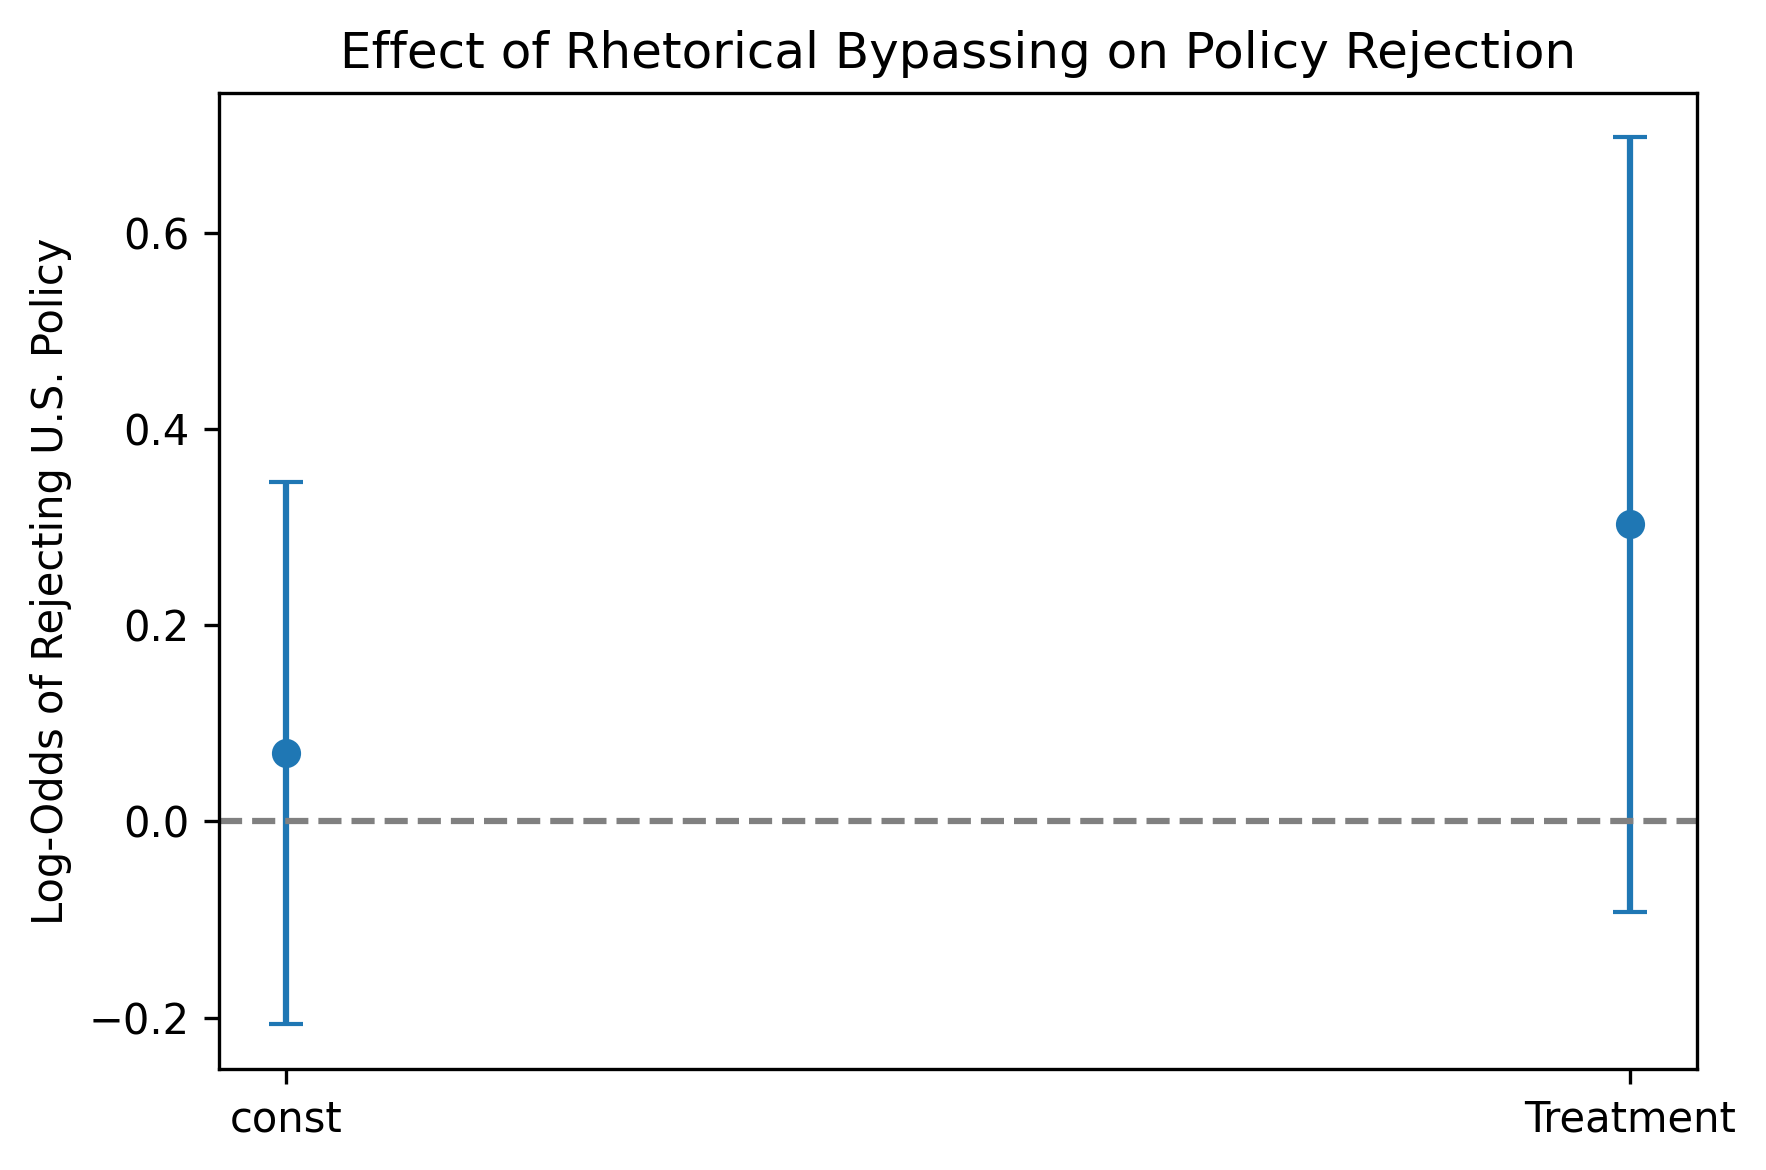

In [44]:
# Extract coefficient and CI
coef = model.params
conf = model.conf_int()
errors = (conf[1] - conf[0]) / 2

# Plot
plt.figure(figsize=(6, 4), dpi=300)
plt.errorbar(coef.index, coef.values, yerr=errors.values, fmt='o', capsize=4)
plt.axhline(0, color='grey', linestyle='--')
plt.title("Effect of Rhetorical Bypassing on Policy Rejection")
plt.ylabel("Log-Odds of Rejecting U.S. Policy")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


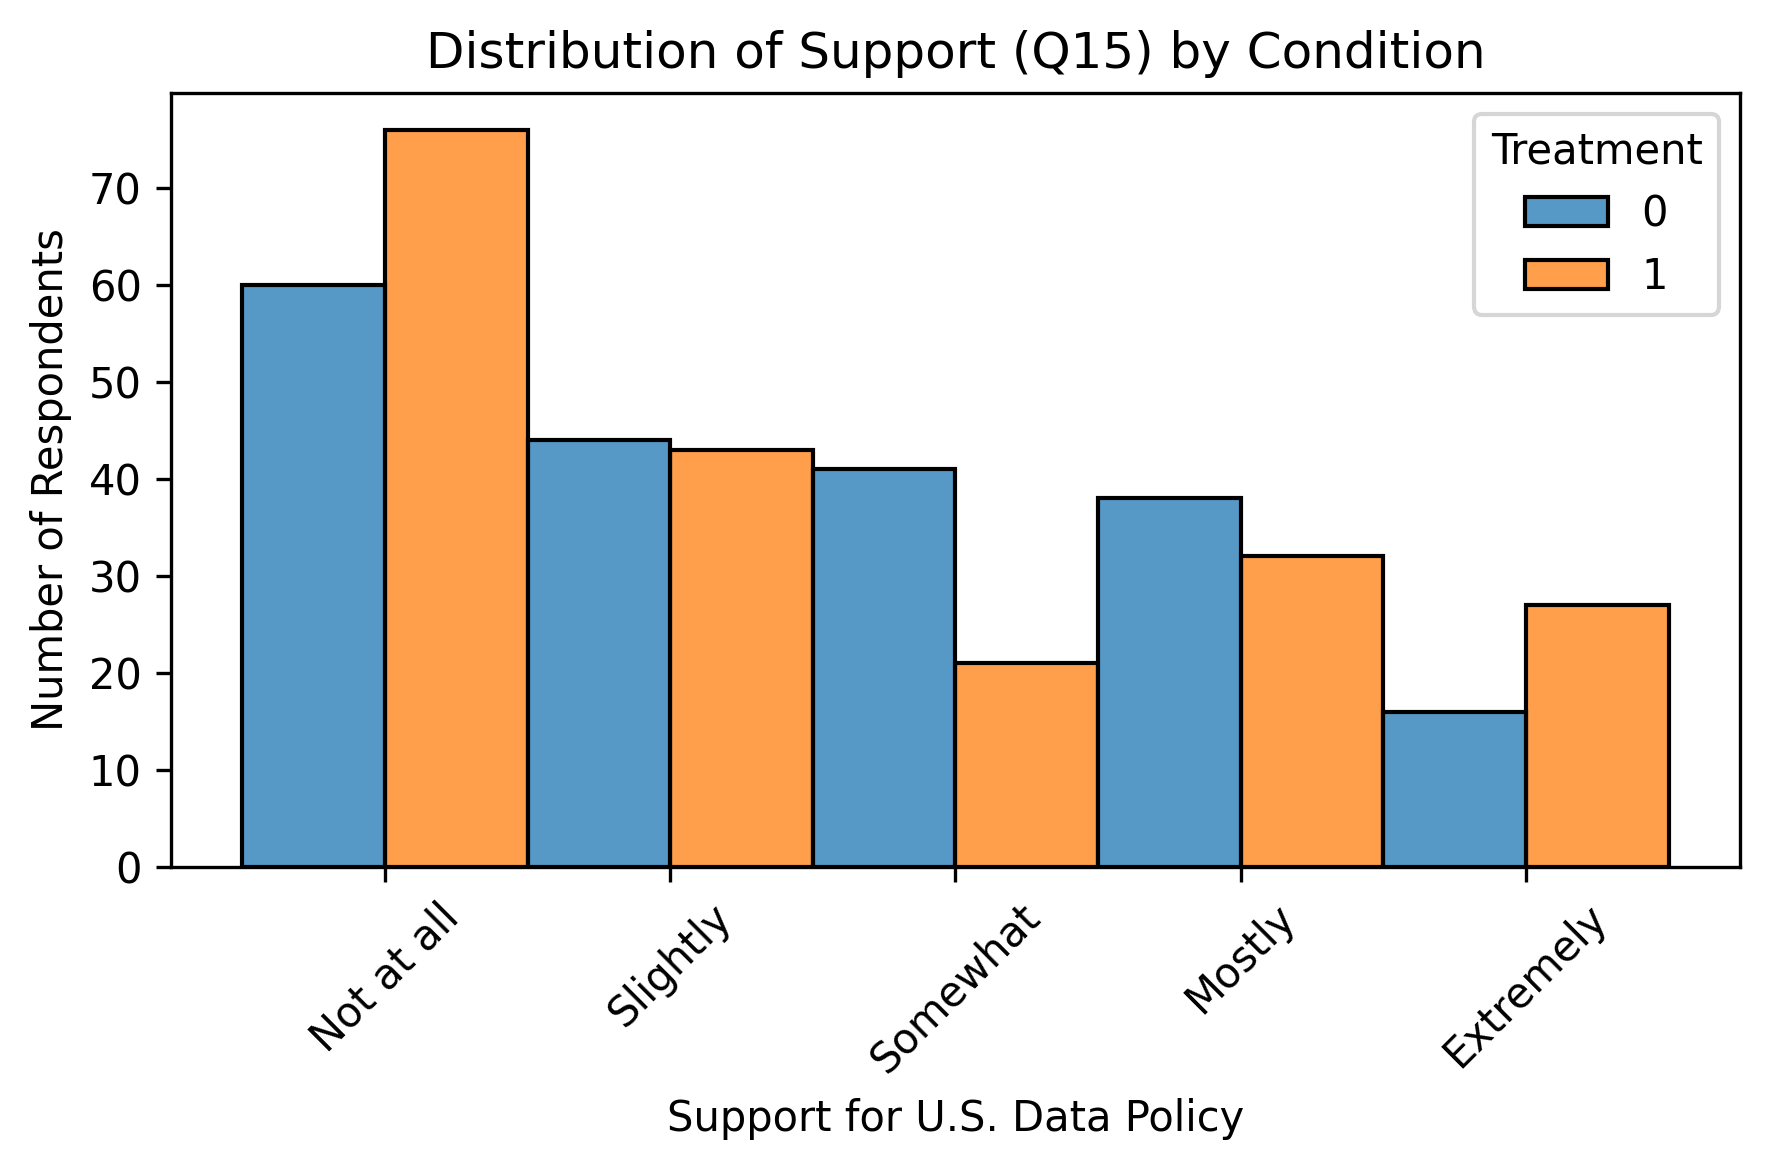

In [45]:
plt.figure(figsize=(6,4), dpi=300)
sns.histplot(data=df, x='Q15', hue='Treatment', bins=5, multiple='dodge', discrete=True)
plt.xticks([1, 2, 3, 4, 5], ['Not at all', 'Slightly', 'Somewhat', 'Mostly', 'Extremely'], rotation=45)
plt.title("Distribution of Support (Q15) by Condition")
plt.xlabel("Support for U.S. Data Policy")
plt.ylabel("Number of Respondents")
plt.tight_layout()
plt.show()

In [46]:
df['Q8_canada'] = df['Q8'].apply(lambda x: 1 if x == 1 else 0) #Defining q8

#Regression for q8
df_clean_q8 = df[['Treatment', 'Q8_canada']].dropna()
X_q8 = sm.add_constant(df_clean_q8[['Treatment']])
y_q8 = df_clean_q8['Q8_canada']
model_q8 = sm.Logit(y_q8, X_q8).fit()
print(model_q8.summary())

Optimization terminated successfully.
         Current function value: 0.684135
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Q8_canada   No. Observations:                  402
Model:                          Logit   Df Residuals:                      400
Method:                           MLE   Df Model:                            1
Date:                Fri, 11 Jul 2025   Pseudo R-squ.:                0.001835
Time:                        03:26:06   Log-Likelihood:                -275.02
converged:                       True   LL-Null:                       -275.53
Covariance Type:            nonrobust   LLR p-value:                    0.3146
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3518      0.143     -2.456      0.014      -0.633      -0.071
Treatment      0.2023      0.

Optimization terminated successfully.
         Current function value: 0.684135
         Iterations 4


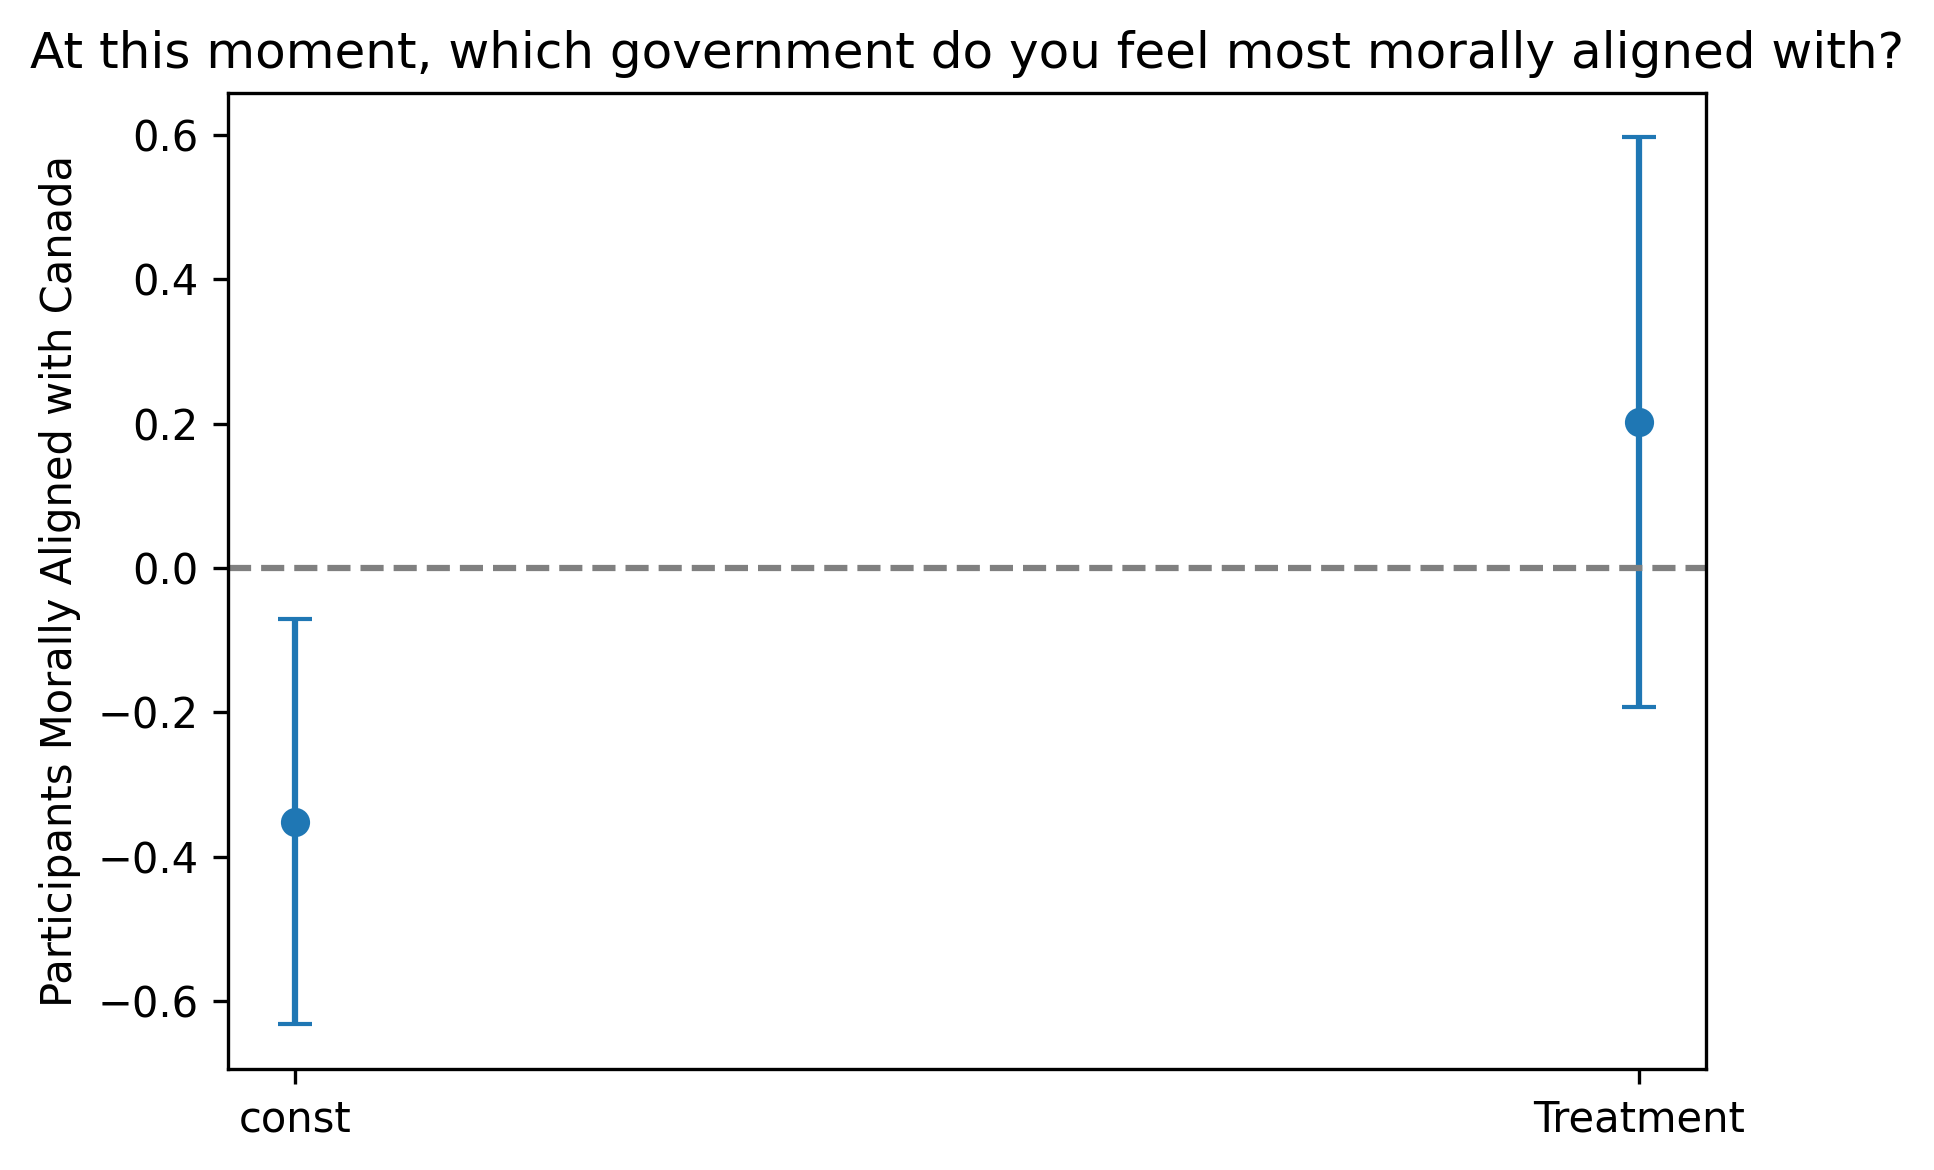

In [47]:
# Drop missing rows
df_clean_q8 = df[['Treatment', 'Q8_canada']].dropna()

# Define X and y for logistic regression
X_q8 = sm.add_constant(df_clean_q8[['Treatment']])
y_q8 = df_clean_q8['Q8_canada']

# Fit logistic regression model
model_q8 = sm.Logit(y_q8, X_q8).fit()

# Extract coefficients and confidence intervals
coef = model_q8.params
conf = model_q8.conf_int()
errors = (conf[1] - conf[0]) / 2

# Plot
plt.figure(figsize=(6, 4), dpi=300)
plt.errorbar(coef.index, coef.values, yerr=errors.values, fmt='o', capsize=4)
plt.axhline(0, color='grey', linestyle='--')
plt.title("At this moment, which government do you feel most morally aligned with?")
plt.ylabel("Participants Morally Aligned with Canada")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Optimization terminated successfully.
         Current function value: 0.636363
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         Q15_not_at_all   No. Observations:                  402
Model:                          Logit   Df Residuals:                      400
Method:                           MLE   Df Model:                            1
Date:                Fri, 11 Jul 2025   Pseudo R-squ.:                0.005539
Time:                        03:26:06   Log-Likelihood:                -255.82
converged:                       True   LL-Null:                       -257.24
Covariance Type:            nonrobust   LLR p-value:                   0.09139
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8544      0.154     -5.543      0.000      -1.157      -0.552
Treatment      0.3568      0.

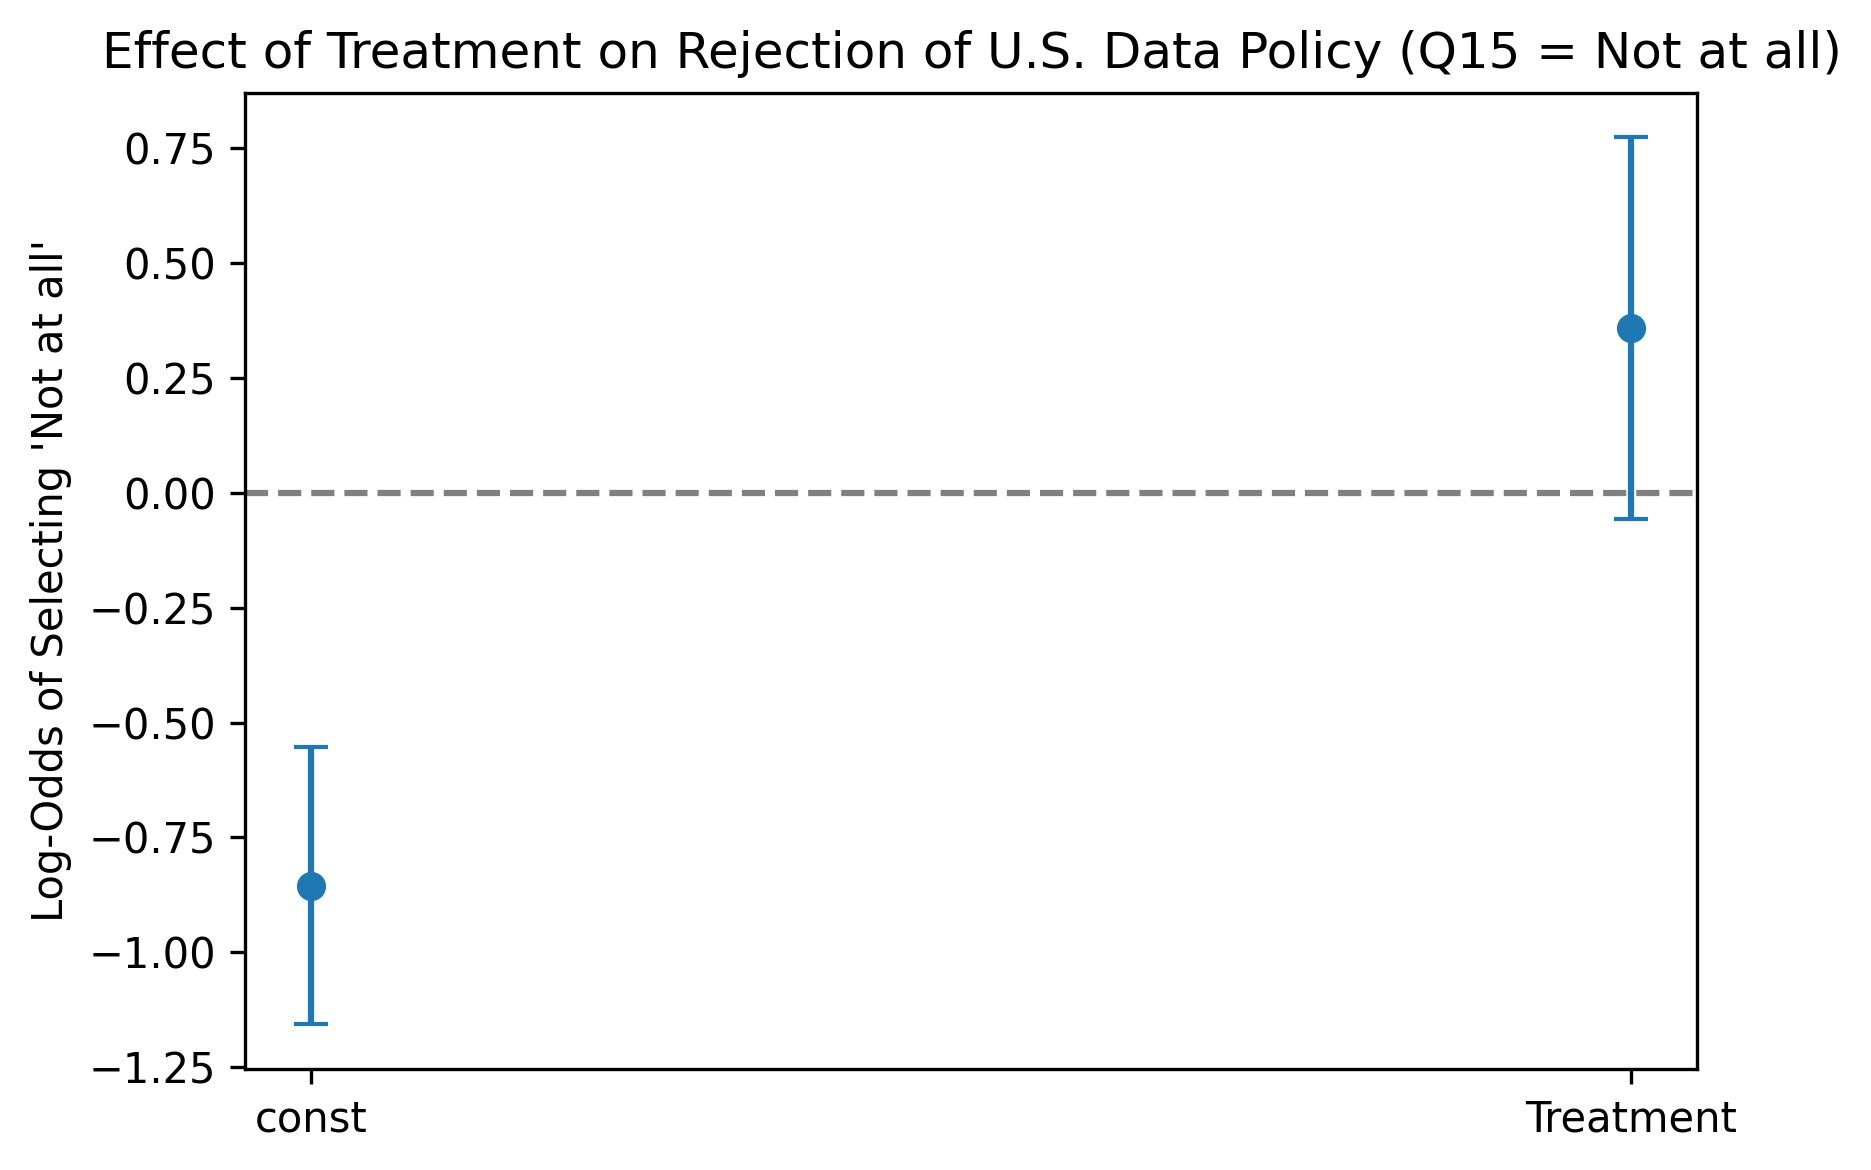

In [48]:
# Create binary outcome: 1 if "Not at all", 0 otherwise
df['Q15_not_at_all'] = df['Q15'].apply(lambda x: 1 if x == 1 else 0)

# Drop missing values
df_clean_q15bin = df[['Treatment', 'Q15_not_at_all']].dropna()

# Define X and y
X_q15bin = sm.add_constant(df_clean_q15bin[['Treatment']])
y_q15bin = df_clean_q15bin['Q15_not_at_all']

# Fit logistic regression
model_q15bin = sm.Logit(y_q15bin, X_q15bin).fit()
print(model_q15bin.summary())

# Extract coefficients and confidence intervals
coef = model_q15bin.params
conf = model_q15bin.conf_int()
errors = (conf[1] - conf[0]) / 2

# Plot the coefficient with confidence interval
plt.figure(figsize=(6, 4), dpi=300)
plt.errorbar(coef.index, coef.values, yerr=errors.values, fmt='o', capsize=4)
plt.axhline(0, color='grey', linestyle='--')
plt.title("Effect of Treatment on Rejection of U.S. Data Policy (Q15 = Not at all)")
plt.ylabel("Log-Odds of Selecting 'Not at all'")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Optimization terminated successfully.
         Current function value: 0.681893
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            Q9_disagree   No. Observations:                  402
Model:                          Logit   Df Residuals:                      400
Method:                           MLE   Df Model:                            1
Date:                Fri, 11 Jul 2025   Pseudo R-squ.:                0.001185
Time:                        03:26:06   Log-Likelihood:                -274.12
converged:                       True   LL-Null:                       -274.45
Covariance Type:            nonrobust   LLR p-value:                    0.4199
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3724      0.144     -2.595      0.009      -0.654      -0.091
Treatment      0.1627      0.

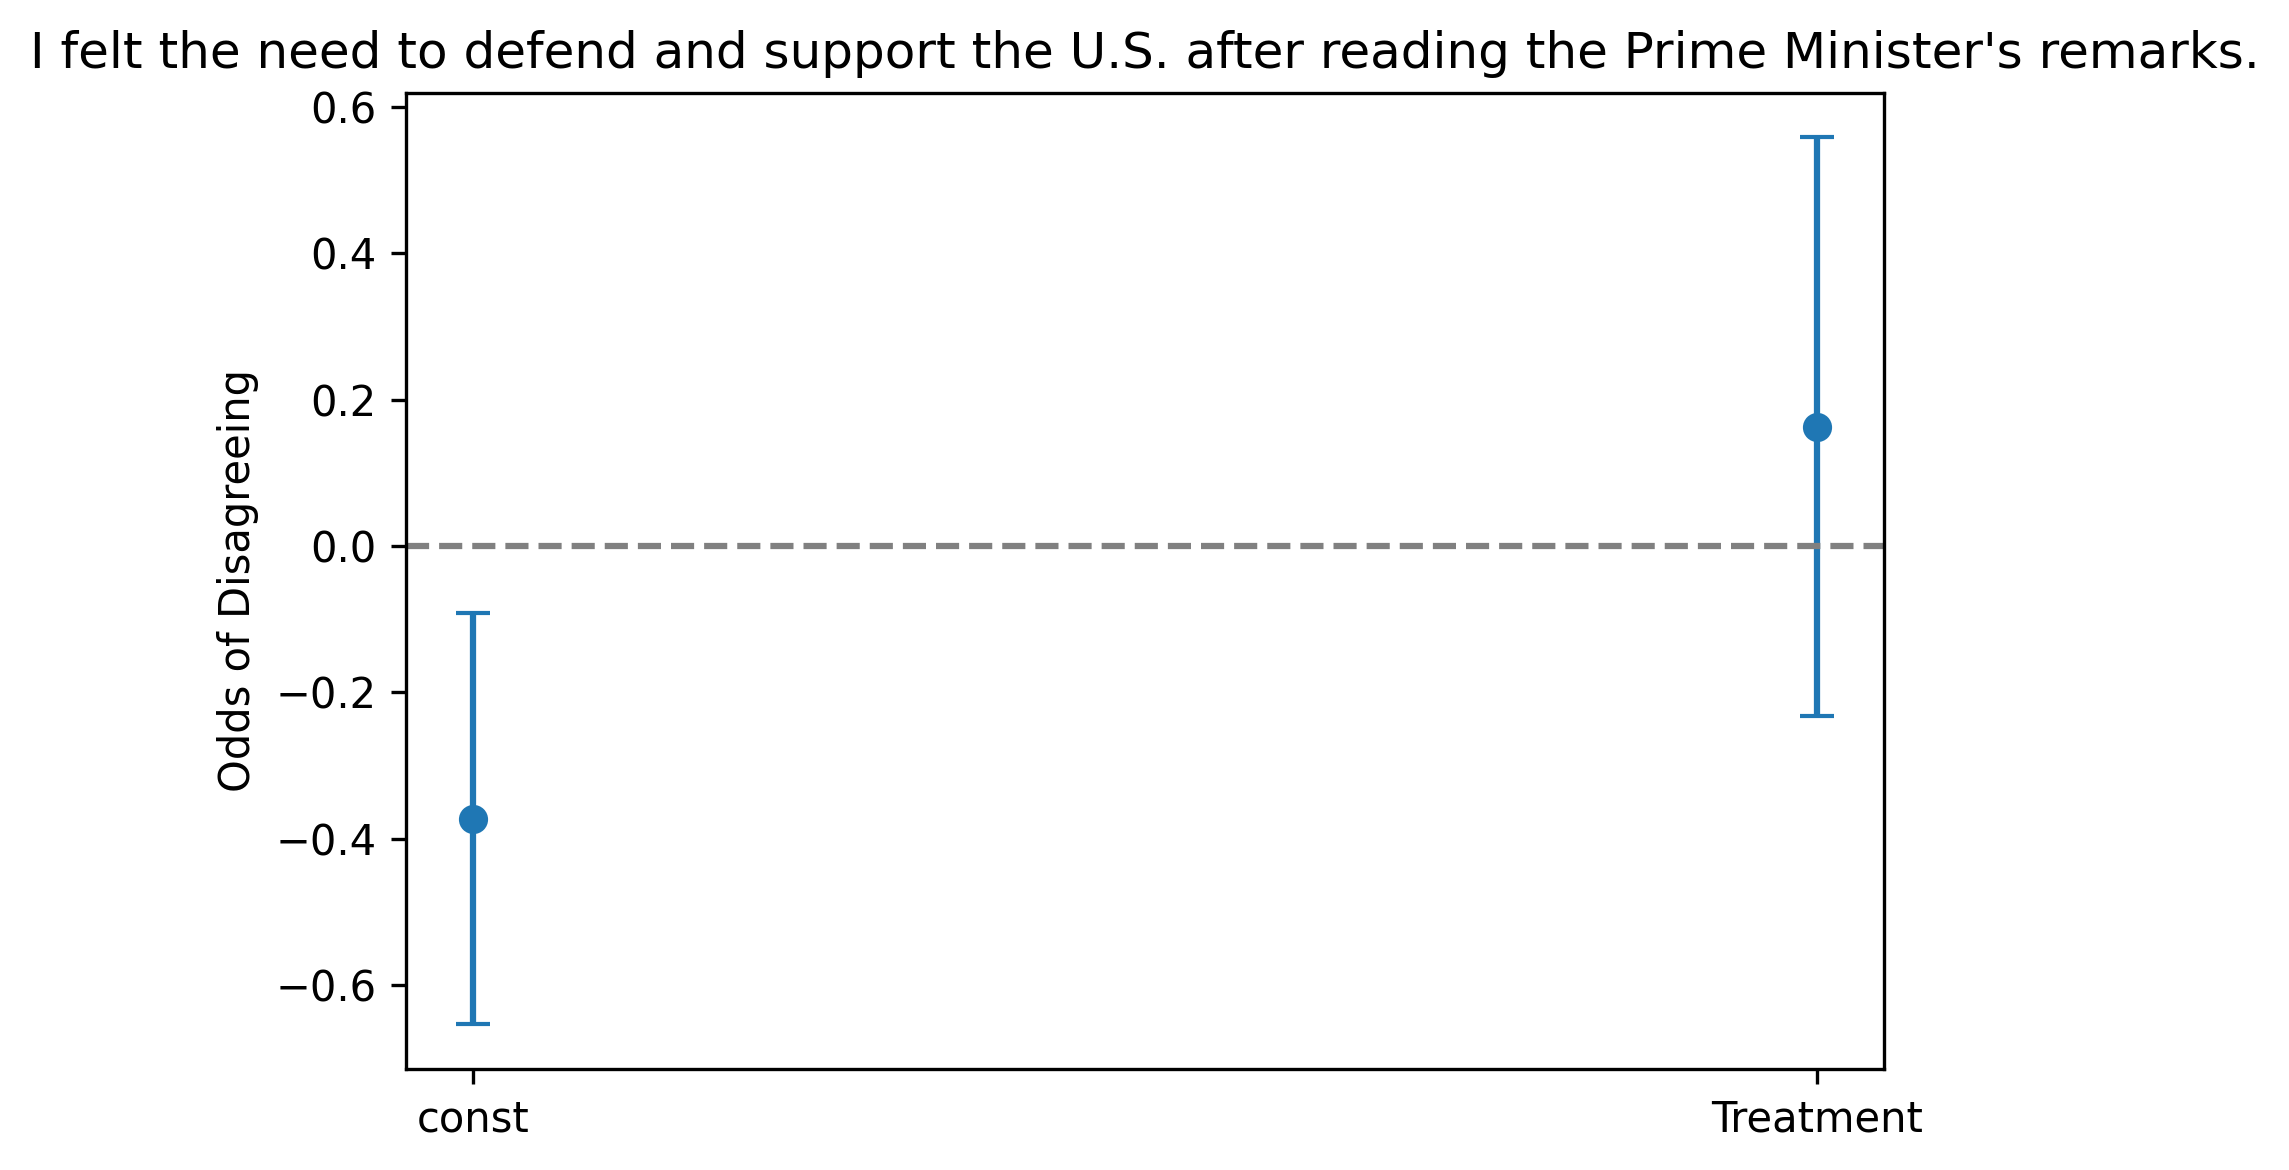

In [49]:
# Create binary outcome: 1 if "Not at all", 0 otherwise
df['Q9_disagree'] = df['Q9'].apply(lambda x: 1 if x in[1,2] else 0)

# Drop missing values
df_clean_q9 = df[['Treatment', 'Q9_disagree']].dropna()

# Define X and y
X_q9 = sm.add_constant(df_clean_q9[['Treatment']])
y_q9 = df_clean_q9['Q9_disagree']

# Fit logistic regression
model_q9 = sm.Logit(y_q9, X_q9).fit()
print(model_q9.summary())

# Extract coefficients and confidence intervals
coef = model_q9.params
conf = model_q9.conf_int()
errors = (conf[1] - conf[0]) / 2

# Plot the coefficient with confidence interval
plt.figure(figsize=(6, 4), dpi=300)
plt.errorbar(coef.index, coef.values, yerr=errors.values, fmt='o', capsize=4)
plt.axhline(0, color='grey', linestyle='--')
plt.title("I felt the need to defend and support the U.S. after reading the Prime Minister's remarks.")
plt.ylabel("Odds of Disagreeing")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Optimization terminated successfully.
         Current function value: 0.681893
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:            Q9_disagree   No. Observations:                  402
Model:                          Logit   Df Residuals:                      400
Method:                           MLE   Df Model:                            1
Date:                Fri, 11 Jul 2025   Pseudo R-squ.:                0.001185
Time:                        03:36:02   Log-Likelihood:                -274.12
converged:                       True   LL-Null:                       -274.45
Covariance Type:            nonrobust   LLR p-value:                    0.4199
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3724      0.144     -2.595      0.009      -0.654      -0.091
Treatment      0.1627      0.

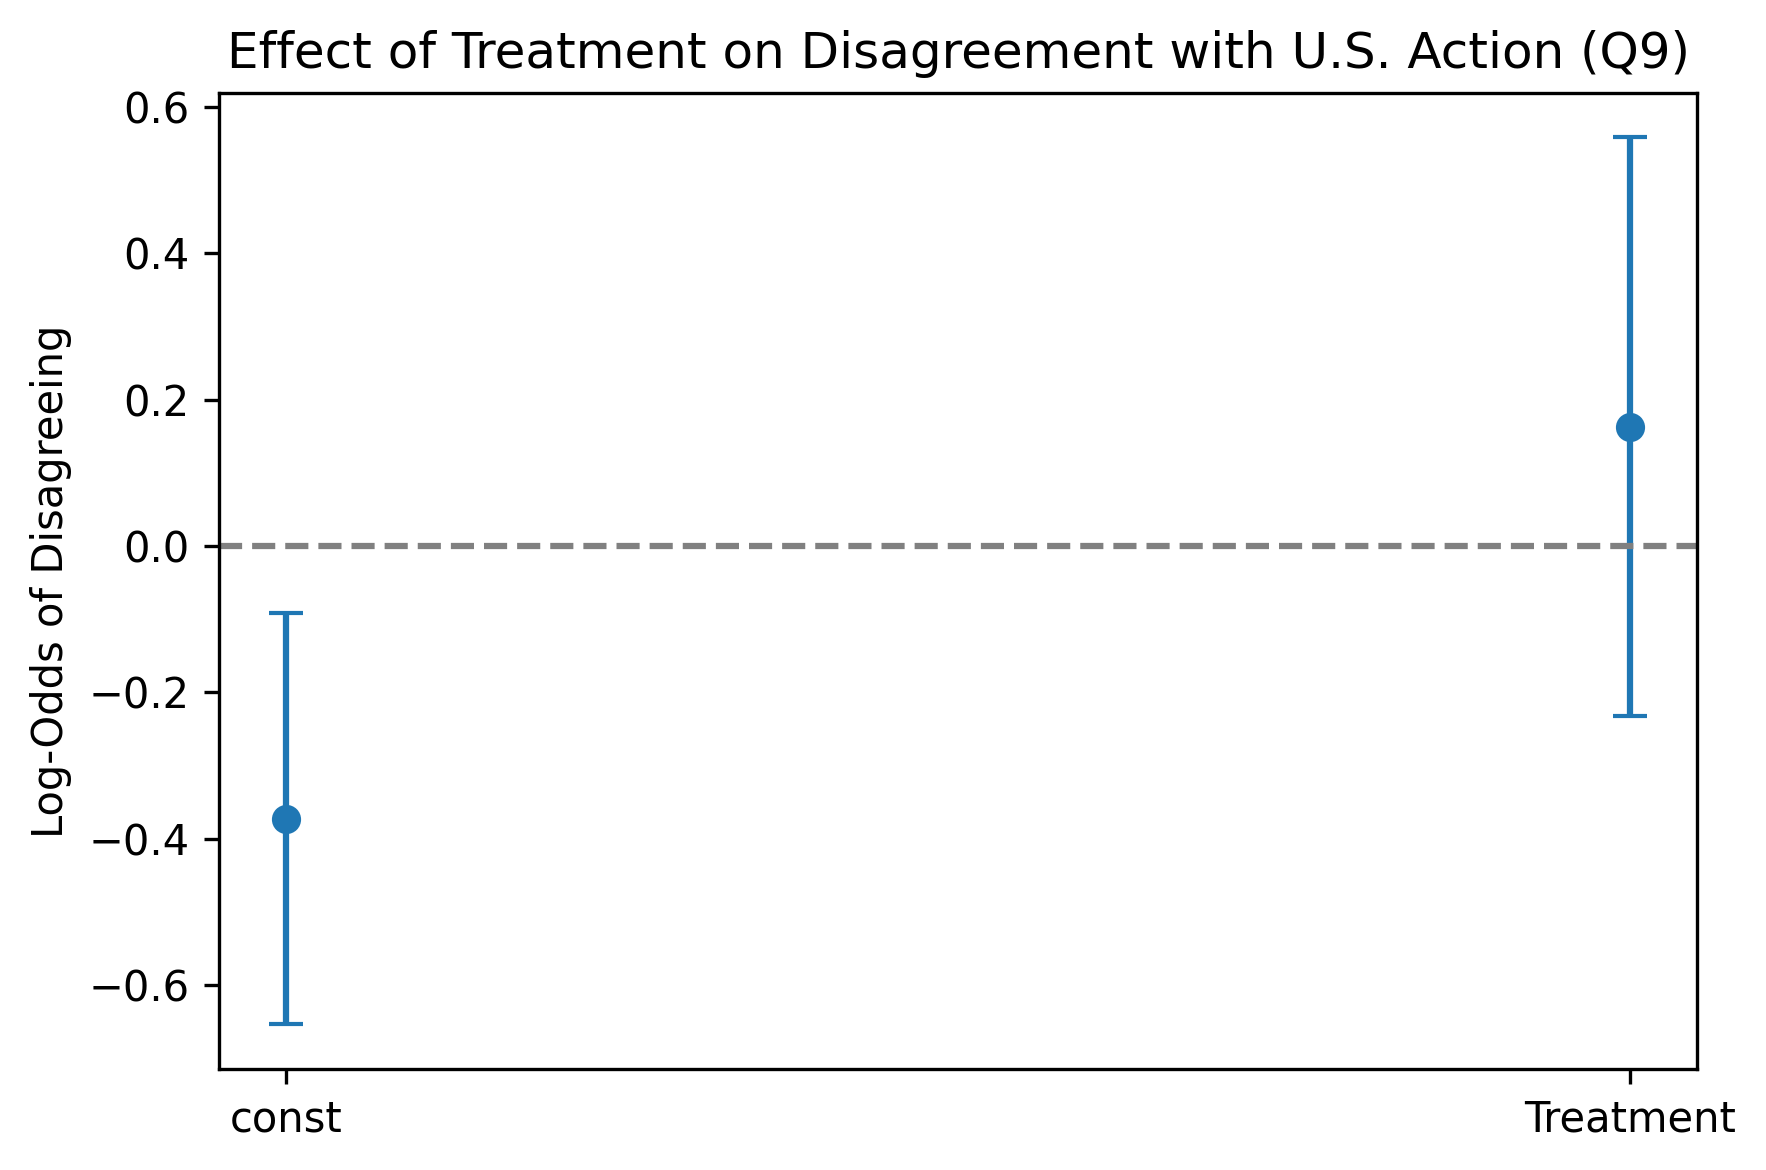

In [54]:
# Create binary outcome: disagree = 1, otherwise 0
df['Q9_disagree'] = df['Q9'].apply(lambda x: 1 if x in [1, 2] else 0)

# Treatment group: 1 if FL_24, else 0
df['Treatment'] = (df['FL_22_DO'] == 'FL_24').astype(int)

# Prepare data
df_clean_q9 = df[['Treatment', 'Q9_disagree']].dropna()
X_q9 = sm.add_constant(df_clean_q9[['Treatment']])
y_q9 = df_clean_q9['Q9_disagree']

# Logistic regression
model_q9 = sm.Logit(y_q9, X_q9).fit()
print(model_q9.summary())

# Coefficient plot
coef = model_q9.params
conf = model_q9.conf_int()
errors = (conf[1] - conf[0]) / 2

plt.figure(figsize=(6, 4), dpi=300)
plt.errorbar(coef.index, coef.values, yerr=errors.values, fmt='o', capsize=4)
plt.axhline(0, color='grey', linestyle='--')
plt.title("Effect of Treatment on Disagreement with U.S. Action (Q9)")
plt.ylabel("Log-Odds of Disagreeing")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Optimization terminated successfully.
         Current function value: 0.384164
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Q10_agree   No. Observations:                  402
Model:                          Logit   Df Residuals:                      400
Method:                           MLE   Df Model:                            1
Date:                Fri, 11 Jul 2025   Pseudo R-squ.:                0.002573
Time:                        04:18:57   Log-Likelihood:                -154.43
converged:                       True   LL-Null:                       -154.83
Covariance Type:            nonrobust   LLR p-value:                    0.3721
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0463      0.222      9.235      0.000       1.612       2.481
Treatment     -0.2661      0.

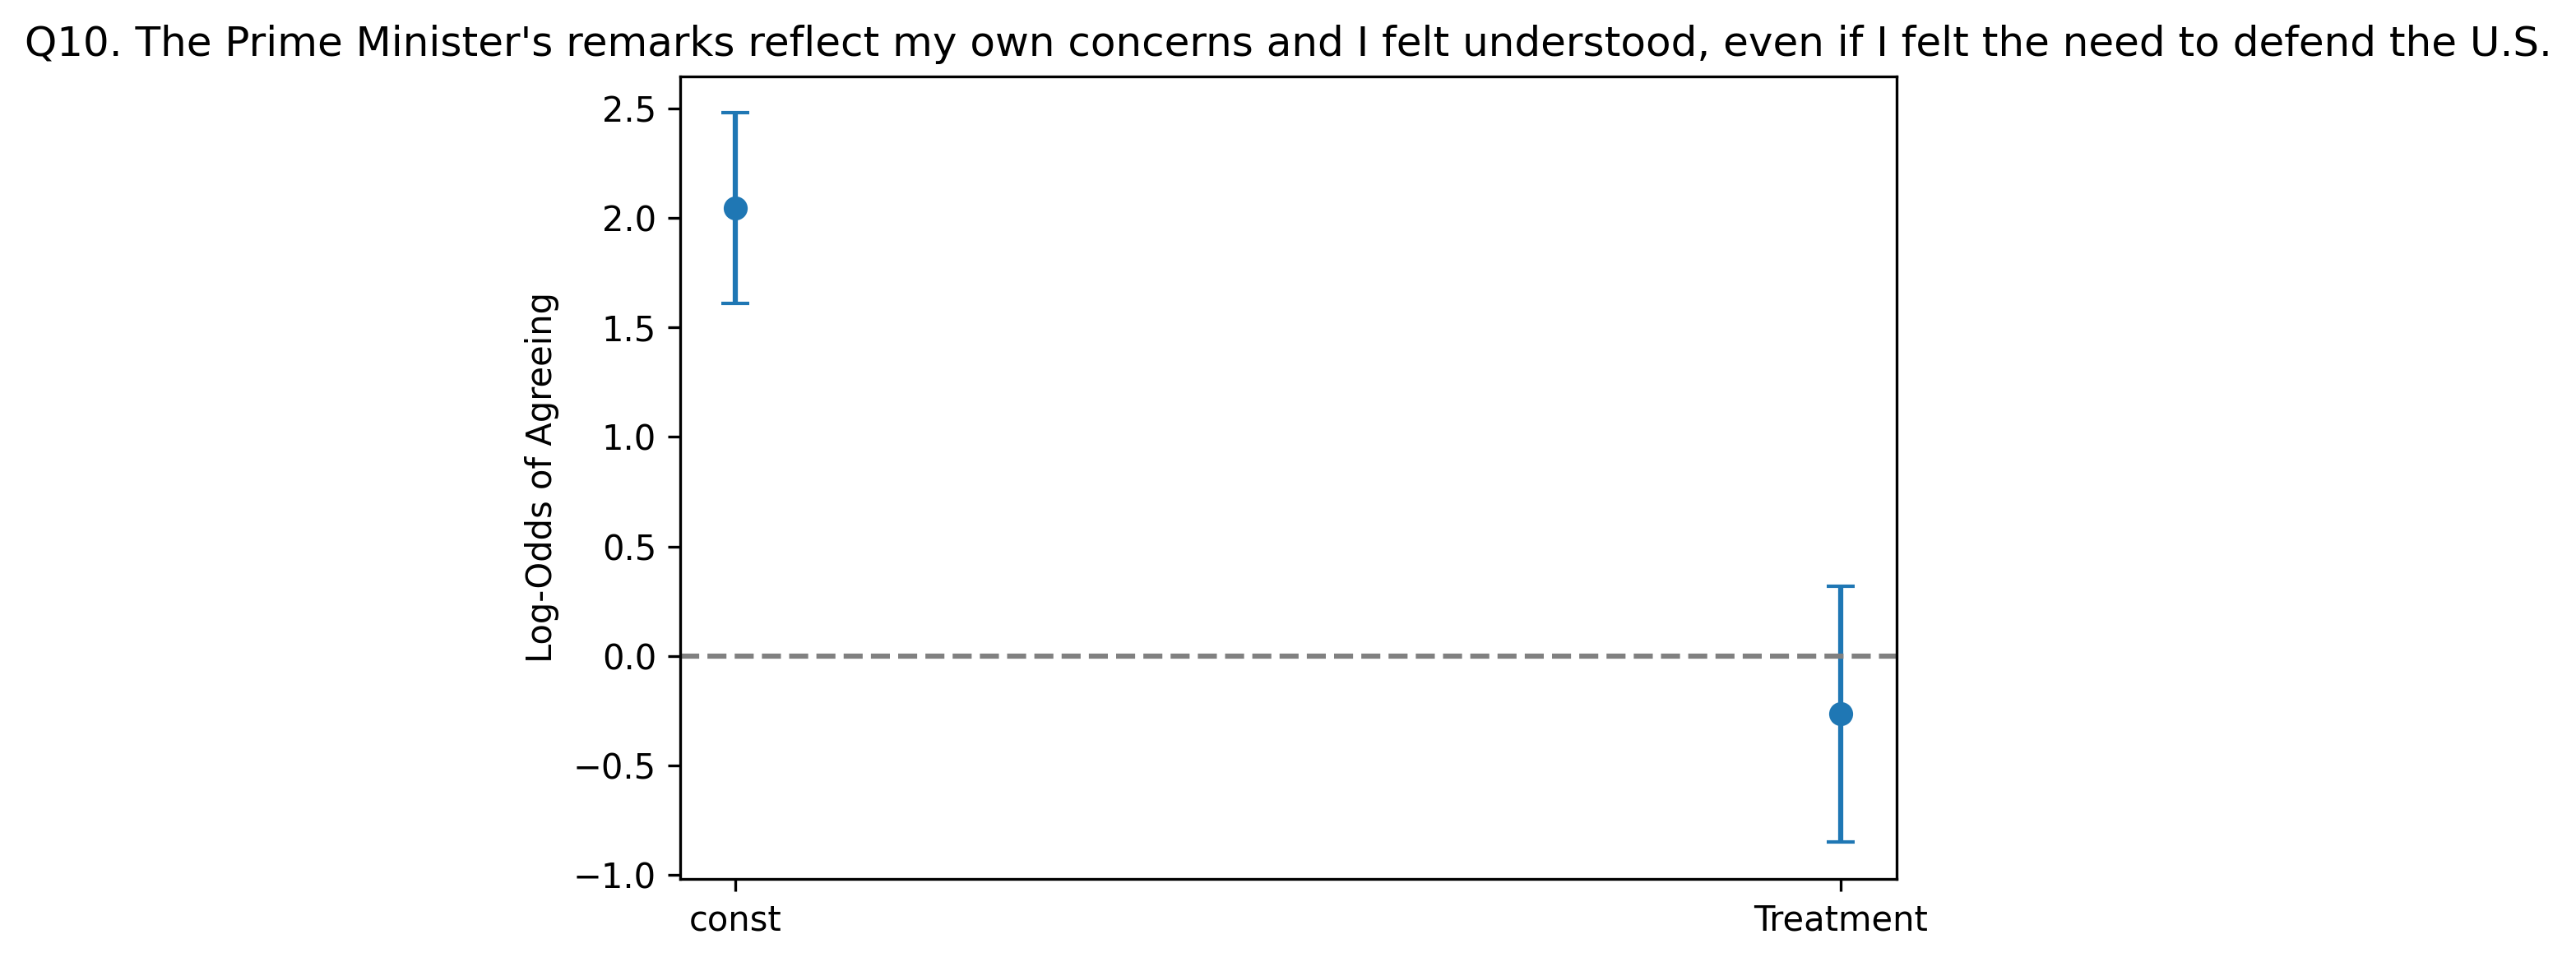

In [57]:
#Q10 The Prime Minister's remarks reflect my own concerns and I felt understood, even if I felt the need to defend the U.S.
df['Q10_agree'] = df['Q10'].apply(lambda x: 1 if x in [3,4,5] else 0)

df['Treatment'] = (df['FL_22_DO'] == 'FL_24').astype(int)

# Prepare data
df_clean_q10 = df[['Treatment', 'Q10_agree']].dropna()
X_q10 = sm.add_constant(df_clean_q10[['Treatment']])
y_q10 = df_clean_q10['Q10_agree']

# Logistic regression
model_q10 = sm.Logit(y_q10, X_q10).fit()
print(model_q10.summary())

# Coefficient plot
coef = model_q10.params
conf = model_q10.conf_int()
errors = (conf[1] - conf[0]) / 2

plt.figure(figsize=(6, 4), dpi=300)
plt.errorbar(coef.index, coef.values, yerr=errors.values, fmt='o', capsize=4)
plt.axhline(0, color='grey', linestyle='--')
plt.title("Q10. The Prime Minister's remarks reflect my own concerns and I felt understood, even if I felt the need to defend the U.S.")
plt.ylabel("Log-Odds of Agreeing")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Trust: Q11 I believe the Prime Minister’s message was sincere.
df['Q10_agree'] = df['Q10'].apply(lambda x: 1 if x in [4,5] else 0)

df['Treatment'] = (df['FL_22_DO'] == 'FL_24').astype(int)

# Prepare data
df_clean_q10 = df[['Treatment', 'Q10_agree']].dropna()
X_q10 = sm.add_constant(df_clean_q10[['Treatment']])
y_q10 = df_clean_q10['Q10_agree']

# Logistic regression
model_q10 = sm.Logit(y_q10, X_q10).fit()
print(model_q10.summary())

# Coefficient plot
coef = model_q10.params
conf = model_q10.conf_int()
errors = (conf[1] - conf[0]) / 2

plt.figure(figsize=(6, 4), dpi=300)
plt.errorbar(coef.index, coef.values, yerr=errors.values, fmt='o', capsize=4)
plt.axhline(0, color='grey', linestyle='--')
plt.title("Q11 I believe the Prime Minister’s message was sincere.")
plt.ylabel("Log-Odds of Agreeing")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()